**Нейросеть на базе Keras**

Обучение с учителем

27 переменных Х, 3 бинарные Y

# Импорт библиотек

In [173]:
import numpy as np
import pandas as pd

import pylab

import matplotlib.pyplot as plt

import keras as k
from keras import layers
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

# Ввод статистики

In [174]:
# ------------ Источник ------------ #

df_url = "https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/Stat_wheat/WeekDyn_nonfilter_all536_3binYs.txt"

df_name = "Week dynamic"

df = pd.read_csv(df_url,
               sep='\t', 
               error_bad_lines=False,
               decimal=',',
               encoding='gbk', 
               skiprows=1)

In [175]:
# ------------ Параметры данных ------------ #

dates = df.iloc[:, 0:1]
X = df.iloc[:, 1:28]
Y = df.iloc[:, 28:31]

df_length = len(df)
df_width = len(df.columns)

In [176]:
X = np.array(X.astype(np.float32))
Y = np.array(Y.astype(np.int32))

In [177]:
# ------------ Разбивка данных на фрагменты ------------ #

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)

# Обработка

No handles with labels found to put in legend.


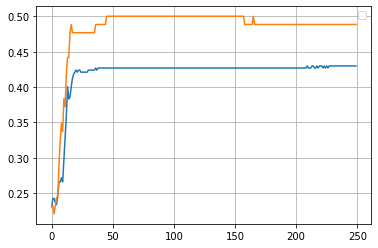

No handles with labels found to put in legend.


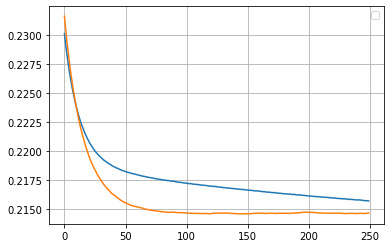

In [181]:
model = k.Sequential()
model.add(k.layers.Dense(units=27, activation='relu'))
model.add(k.layers.Dense(units=13, activation='sigmoid'))
model.add(k.layers.Dense(units=3, activation='softmax'))

# optimizer=keras.optimizers.Adam(0.001)
# optimizer='sgd'
model.compile(loss='mse', optimizer=keras.optimizers.SGD(0.01), metrics=['accuracy'])
fit_results = model.fit(train_x, train_y, epochs=250, validation_split=0.2, verbose=0)

plt.plot(fit_results.history['accuracy'])
plt.plot(fit_results.history['val_accuracy'])
plt.grid(1)
plt.legend()
plt.show()

plt.plot(fit_results.history['loss'])
plt.plot(fit_results.history['val_loss'])
plt.grid(1)
plt.legend()
plt.show()

# Результаты

In [179]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 27)                756       
_________________________________________________________________
dense_102 (Dense)            (None, 19)                532       
_________________________________________________________________
dense_103 (Dense)            (None, 3)                 60        
Total params: 1,348
Trainable params: 1,348
Non-trainable params: 0
_________________________________________________________________


In [180]:
pd.concat([pd.DataFrame(test_y, columns=('real Short','real Long','neutral')), pd.DataFrame(model.predict(test_x), columns=('pr Short','pr Long','pr neutral'))],1)

,real Short,real Long,neutral,pr Short,pr Long,pr neutral
0,0,1,0,0.224943,0.340808,0.434248
1,1,0,0,0.230641,0.342621,0.426738
2,0,0,1,0.239670,0.341818,0.418512
3,1,0,0,0.229568,0.336483,0.433949
4,0,0,1,0.233206,0.345428,0.421366
...,...,...,...,...,...,...
103,0,0,1,0.220705,0.349918,0.429377
104,0,0,1,0.226074,0.319147,0.454780
105,0,1,0,0.235382,0.341745,0.422873
106,0,0,1,0.326309,0.315042,0.358649
